In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
try:
    import theano
except:
    !pip install Theano
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
churn_data = pd.read_csv('/content/drive/MyDrive/Dataset/Combineddataset.csv')
churn_data.replace(np.nan, 0)

,GE6151 (CP),MA6151 (Maths I),MA6251(Maths II),CS6202(PDS-I),MA6351(Maths),CS6301(PDS-II),CS6302(DBMS),CS6402 (OS),CS6401 (DAA),CS6403 (SE),MA6453,CS6502 (OOPS),Category
0,6,5,0,5,5,0,0,5,0,0,0,5,0
1,10,8,0,7,0,8,8,7,8,5,7,7,2
2,6,0,0,0,5,0,0,5,7,5,0,5,0
3,6,5,5,5,5,0,6,6,5,8,0,5,0
4,9,7,7,5,8,8,7,8,7,8,7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,6,5,0,7,5,5,7,0,5,0,5,5,0
227,7,6,7,9,8,7,9,7,7,6,8,8,1
228,5,5,5,8,9,7,8,7,6,6,7,7,0
229,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   GE6151 (CP)       231 non-null    int64
 1   MA6151 (Maths I)  231 non-null    int64
 2   MA6251(Maths II)  231 non-null    int64
 3   CS6202(PDS-I)     231 non-null    int64
 4   MA6351(Maths)     231 non-null    int64
 5   CS6301(PDS-II)    231 non-null    int64
 6   CS6302(DBMS)      231 non-null    int64
 7   CS6402 (OS)       231 non-null    int64
 8   CS6401 (DAA)      231 non-null    int64
 9   CS6403 (SE)       231 non-null    int64
 10  MA6453            231 non-null    int64
 11  CS6502 (OOPS)     231 non-null    int64
 12  Category          231 non-null    int64
dtypes: int64(13)
memory usage: 23.6 KB


In [ ]:
churn_data.describe()

,GE6151 (CP),MA6151 (Maths I),MA6251(Maths II),CS6202(PDS-I),MA6351(Maths),CS6301(PDS-II),CS6302(DBMS),CS6402 (OS),CS6401 (DAA),CS6403 (SE),MA6453,CS6502 (OOPS),Category
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,6.367965,5.411255,4.484848,5.077922,5.220779,5.367965,5.471861,5.008658,4.493506,4.558442,4.082251,5.259740,0.675325
std,2.099403,2.728219,2.565403,2.909204,2.739200,2.751855,2.531168,3.071597,2.954540,3.026665,2.936604,2.749241,0.809319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,7.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,6.000000,0.000000
75%,8.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000
max,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,10.000000,9.000000,9.000000,9.000000,10.000000,3.000000


In [ ]:
churn_data.head()

,GE6151 (CP),MA6151 (Maths I),MA6251(Maths II),CS6202(PDS-I),MA6351(Maths),CS6301(PDS-II),CS6302(DBMS),CS6402 (OS),CS6401 (DAA),CS6403 (SE),MA6453,CS6502 (OOPS),Category
0,6,5,0,5,5,0,0,5,0,0,0,5,0
1,10,8,0,7,0,8,8,7,8,5,7,7,2
2,6,0,0,0,5,0,0,5,7,5,0,5,0
3,6,5,5,5,5,0,6,6,5,8,0,5,0
4,9,7,7,5,8,8,7,8,7,8,7,7,1


In [ ]:
churn_data.head()

,GE6151 (CP),MA6151 (Maths I),MA6251(Maths II),CS6202(PDS-I),MA6351(Maths),CS6301(PDS-II),CS6302(DBMS),CS6402 (OS),CS6401 (DAA),CS6403 (SE),MA6453,CS6502 (OOPS),Category
0,6,5,0,5,5,0,0,5,0,0,0,5,0
1,10,8,0,7,0,8,8,7,8,5,7,7,2
2,6,0,0,0,5,0,0,5,7,5,0,5,0
3,6,5,5,5,5,0,6,6,5,8,0,5,0
4,9,7,7,5,8,8,7,8,7,8,7,7,1


In [ ]:
churn_data_encoded=churn_data

In [ ]:
X = churn_data_encoded.drop(['Category'],axis=1)
y = churn_data_encoded.Category

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

In [ ]:
print(X_test)
X_test.head()

     GE6151 (CP)  MA6151 (Maths I)  ...  MA6453  CS6502 (OOPS)
78             5                 5  ...       0              0
150            7                 5  ...       7              7
171            7                 5  ...       5              7
228            5                 5  ...       7              7
190            5                 0  ...       0              5
..           ...               ...  ...     ...            ...
117            7                 6  ...       7              5
163            7                 5  ...       5              5
106            8                 0  ...       0              7
89             8                 8  ...       0              6
59             5                 0  ...       0              0

[70 rows x 12 columns]


,GE6151 (CP),MA6151 (Maths I),MA6251(Maths II),CS6202(PDS-I),MA6351(Maths),CS6301(PDS-II),CS6302(DBMS),CS6402 (OS),CS6401 (DAA),CS6403 (SE),MA6453,CS6502 (OOPS)
78,5,5,0,0,0,0,0,0,0,0,0,0
150,7,5,5,7,5,6,6,6,5,0,7,7
171,7,5,5,5,5,7,7,7,7,5,5,7
228,5,5,5,8,9,7,8,7,6,6,7,7
190,5,0,0,0,7,5,5,0,5,0,0,5


In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
np.nan_to_num(X_test)
print(X_test)

[[-0.52998739 -0.14556101 -1.68103428 -1.69379818 -1.82650409 -1.91323274
  -2.10277389 -1.45288283 -1.38455539 -1.45149191 -1.42440378 -1.82784426]
 [ 0.3496824  -0.14556101  0.22224644  0.65130077 -0.04643654  0.23083086
   0.23740996  0.40850287  0.2497072  -1.45149191  0.9398128   0.65107329]
 [ 0.3496824  -0.14556101  0.22224644 -0.0187275  -0.04643654  0.5881748
   0.6274406   0.71873382  0.90341224  0.17361377  0.26432235  0.65107329]
 [-0.52998739 -0.14556101  0.22224644  0.98631491  1.37761749  0.5881748
   1.01747124  0.71873382  0.57655972  0.49863491  0.9398128   0.65107329]
 [-0.52998739 -1.92096421 -1.68103428 -1.69379818  0.66559047 -0.12651307
  -0.15262069 -1.45288283  0.2497072  -1.45149191 -1.42440378 -0.05718887]
 [-0.52998739 -0.14556101 -1.68103428 -1.69379818 -0.04643654 -0.12651307
  -0.15262069  0.40850287  0.57655972  0.17361377 -1.42440378  0.29694221]
 [-0.52998739  0.20951963  0.22224644  0.98631491  0.66559047 -0.12651307
  -0.15262069 -1.45288283  0.57655

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5428571428571428


[[29  5  1  0]
 [15  8  1  0]
 [ 4  5  1  0]
 [ 1  0  0  0]]


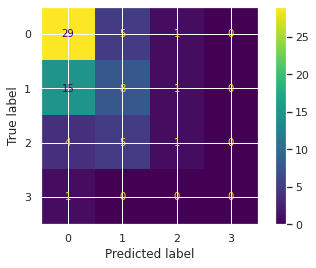

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [ ]:
import pickle
filename = 'rf.sav'
pickle.dump(clf, open(filename, 'wb'))